# 왤케 용량이 클까;;

In [171]:
Qgis_data = gpd.read_file('point)9,3,3,5_2창원시동_조인오류2개해결.geojson') #qgis를 통해 만든 파일

In [172]:
TAAS_data =pd.read_excel('1618_통합.xlsx')                                  #16-18년도 TAAS 차대사람 통합파일

In [173]:
# 내가 생각하는 순서

#0 논문 앞에 이론적 배경 넣어주기

# 1, 결합                         -- 완벽하게 이해요망
# 2. 결측치 처리                  -- 다시 확인하고
# 3. 이상치 확인                  -- 새로 작업

##여기서 소수클래스는 묶어서 원핫처리??


#     변수 추가(--,--) 
# 4. 수치/범주형으로 변환         -- 완벽한 이해요망
# 5. 알맞는 표현식으로 변환       -- 준비중



# EDA 해야징  (부분 시각화작업이겠지??)
### EDA하고 나서 순환속성 변수로 변환해야겠다


# 6. 상관계수 분석                -- 많은 변수를 하면 시각화가
# ## vif 작업도 꼭꼭꼭 병행하자!!!!!!!!!!!!!


# 7. 분산 분석
# 8. 정규화
# 9. 최종 사용할 변수 선택
#=======쉬는날 하루면 될듯=============


# 머신러닝

# 하이퍼 파라미터

# 결과 해석 후 글쓰기 
#===========하루=======================

In [174]:
# 주석 달때 상황과 인수도 같이 적어주자
#
#
#
#
#

# 데이터 통합

### 전처리1 merge

In [175]:
#Qgis_data.head()
#TAAS_data.head()

In [176]:
print(int(str(TAAS_data['사고번호'][0])[0:8]))
print(" ".join(TAAS_data['시군구'][1].split(' ')[1:3]))
print(TAAS_data['사고일시'][0][-3:-1])

20160101
창원시 마산합포구
12


In [177]:
#새로운 열로 재 갱신한것 같군

TAAS_data['OCCU_DATE']=0
TAAS_data['SIG_KOR_NM']=0
#TAAS_data['OCCU_TM']=0


for i in range(len(TAAS_data)):
    TAAS_data['OCCU_DATE'][i]=int(str(TAAS_data['사고번호'][i])[0:8])
    TAAS_data['SIG_KOR_NM'][i]=" ".join(TAAS_data['시군구'][i].split(' ')[1:3])
    #TAAS_data['OCCU_TM'][i]=TAAS_data['사고일시'][i][-3:-1]
    
TAAS_data['LCLAS'] = TAAS_data['사고내용']

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [178]:
#아래 코드가 머지??

In [1]:
#pd.merge(Qgis_data.astype(str), TAAS_data.astype(str),how='left')[pd.merge(Qgis_data.astype(str), TAAS_data.astype(str),how='left').duplicated(['OCCU_DATE','시군구'])]

In [180]:
pd.merge(Qgis_data.astype(str), TAAS_data.astype(str),how='left')['시군구'].isnull().sum() #??

26

In [181]:
merge_df = pd.merge(Qgis_data.astype(str), TAAS_data.astype(str),how='left') #???

In [183]:
df =merge_df.drop_duplicates(['OBJT_ID'], keep='last')   #??

In [184]:
print(merge_df.shape)
print(df.shape)

(2282, 93)

In [187]:
# 왜 재갱신 한걸까? 어떤걸 드랍했지?

# 드랍한것' 
# 사고번호', '사고일시',                                                    (의미없음/중복)
#'요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수'  (중복됨)
# 순서 조정겸

df = df[['OBJT_ID', 'OCCU_YEAR', 'OCCU_MT', 'OCCU_DE', 'OCCU_TM', 'OCCU_DAY',
       'OCCU_DATE', 'LCLAS', 'SCLAS', 'DEATH', 'SWPSN', 'SINJPSN', 'INJPSN',
       'DRNKG', 'KID', 'ODSN', 'WLKG', 'VIOLT_CN', 'CTPRVN_CD', 'SGG_CD',
       'EMD_CD', 'X', 'Y', '차대사람_2_은행_거리_BANK_NM_TargetID',
       '차대사람_2_은행_거리_BANK_NM_Distance', '차대사람_1_교차로_거리_NAME_TargetID',
       '차대사람_1_교차로_거리_NAME_Distance', '차대사람_3_의료기관_거리_의료기관명_TargetID',
       '차대사람_3_의료기관_거리_의료기관명_Distance', '차대사람_4_버스정류장_거리_정류장명_TargetID',
       '차대사람_4_버스정류장_거리_정류장명_Distance', '차대사람_5_유치원_거리_유치원명_TargetID',
       '차대사람_5_유치원_거리_유치원명_Distance', '차대사람_6_시외버스터미널_거리_터미널이름_TargetID',
       '차대사람_6_시외버스터미널_거리_터미널이름_Distance', '차대사람_7_육교_거리_육교번호_TargetID',
       '차대사람_7_육교_거리_육교번호_Distance', '의료기관_점갯수', 'HOUS_mean', 'POP_mean',
       'POP_10_mean', 'POP_20_mean', 'POP_30_mean', 'POP_40_mean',
       'POP_50_mean', 'POP_60_O_mean', '차대사람_8_아동,어린이집_거리_번호_TargetID',
       '차대사람_8_아동,어린이집_거리_번호_Distance', '차대사람_9_노인정_거리_번호_TargetID',
       '차대사람_9_노인정_거리_번호_Distance', '의료면적_ARCHAREA', '의료면적_TOTALAREA',
       '200m_거리9_2갯수_의료,주거인구_2count연립주택_일반주택점',
       '200m_거리9_2갯수_의료,주거인구_2count연립주택_연립주택점',
       '도로중심선_DVYN', '도로중심선_RDLN', '도로중심선_RVWD', '도로중심선_ONSD', '도로중심선_ROAD_BT',
       '도로중심선_real_ROAD_BT', 'STRU', 'length', 'won_RN', 'won_ROAD_LT',
       'won_real_ROAD_BT', 'like도로_jibun', '인도_BYYN', '인도_KIND', 'SIG_KOR_NM',
       '창원시동_EMD_KOR_NM', 'geometry',
       '사고유형', '법규위반', '노면상태', '기상상태',
       '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도']]

### 전처리2 컬럼명 재지정/순서 세팅

In [194]:
#순서는 더 해주자

In [188]:
df.rename(columns={'OBJT_ID':'id',
                   'OCCU_YEAR':'사고년도',
                   'OCCU_MT':'사고월',
                   'OCCU_DE':'사고일자',
                   'OCCU_TM':'사고시간',
                   'OCCU_DAY':'사고요일',
                   'OCCU_DATE':'사고년월일',
                   'LCLAS':'사고형태(Y값)',
                   'SCLAS':'사고구분',
                   'DEATH':'사망자수',
                   'SWPSN':'중상자수',
                   'SINJPSN':'경상자수',
                   'INJPSN':'부상신고자수',
                   'DRNKG':'음주운전사고',
                   'KID':'어린이사고',
                   'ODSN':'노인사고',
                   'WLKG':'보행자사고',
                   'VIOLT_CN':'법규위반내용',
                   'CTPRVN_CD':'시도코드',
                   'SGG_CD':'시군구코드',
                   'EMD_CD':'시도코드',
                   'X':'X(위치)',
                   'Y':'Y(위치)',
                   '차대사람_2_은행_거리_BANK_NM_TargetID':'가까운은행',
                   '차대사람_2_은행_거리_BANK_NM_Distance':'은행거리',
                   '차대사람_1_교차로_거리_NAME_TargetID':'가까운교차로',
                   '차대사람_1_교차로_거리_NAME_Distance':'교차로거리',
                   '차대사람_3_의료기관_거리_의료기관명_TargetID':'가까운의료기관',
                   '차대사람_3_의료기관_거리_의료기관명_Distance':'의료기관거리',
                   '차대사람_4_버스정류장_거리_정류장명_TargetID':'가까운버스정류장',
                   '차대사람_4_버스정류장_거리_정류장명_Distance':'버스정류장거리',
                   '차대사람_5_유치원_거리_유치원명_TargetID':'가까운유치원',
                   '차대사람_5_유치원_거리_유치원명_Distance':'유치원거리',
                   '차대사람_6_시외버스터미널_거리_터미널이름_TargetID':'가까운시외/고속버스터미널',
                   '차대사람_6_시외버스터미널_거리_터미널이름_Distance':'시외고속버스터미널거리',
                   '차대사람_7_육교_거리_육교번호_TargetID':'가까운육교번호',
                   '차대사람_7_육교_거리_육교번호_Distance':'육교거리',
                   '의료기관_점갯수':'의료기관_갯수',
                   'HOUS_mean':'원형200m내_16_세대수',
                   'POP_mean':'원형200m내_16_인구수',
                   'POP_10_mean':'원형200m내_16_10대인구',
                   'POP_20_mean':'원형200m내_16_20대인구',
                   'POP_30_mean':'원형200m내_16_30대인구',
                   'POP_40_mean':'원형200m내_16_40대인구',
                   'POP_50_mean':'원형200m내_16_50대인구',
                   'POP_60_O_mean':'원형200m내_16_60대이상인구',
                   '차대사람_8_아동,어린이집_거리_번호_TargetID':'가까운 아동,어린이집',
                   '차대사람_8_아동,어린이집_거리_번호_Distance':'아동,어린이집거리',
                   '차대사람_9_노인정_거리_번호_TargetID':'가까운 노인정',
                   '차대사람_9_노인정_거리_번호_Distance':'노인정거리',
                   '의료면적_ARCHAREA':'원형200m내_의료기관크기',
                   '의료면적_TOTALAREA':'원형200m내_의료기관거주건물 총크기',
                   '200m_거리9_2갯수_의료,주거인구_2count연립주택_일반주택점':'원형200m내_일반주택수',
                   '200m_거리9_2갯수_의료,주거인구_2count연립주택_연립주택점':'원형200m내_연립주택수',
                   '도로중심선_DVYN':'중심선_분리대유무',
                   '도로중심선_RDLN':'중심선_차로수',
                   '도로중심선_RVWD':'중심선_도로폭',
                   '도로중심선_ONSD':'중심선_일반통행',
                   '도로중심선_ROAD_BT':'중심선_1/3크기 도로폭',
                   '도로중심선_real_ROAD_BT':'중심선_기재된 도로폭',
                   'STRU':'분리대_구조',
                   'length':'분리대길이_사용불가',
                   'won_RN':'도로구간_도로명',
                   'won_ROAD_LT':'도로구간_도로길이',
                   'won_real_ROAD_BT':'도로구간_도로폭',
                   'like도로_jibun':'연속지적도_도로명',
                   '인도_BYYN':'인도_자전거도로 유/무',
                   '인도_KIND':'인도_종류',
                   'SIG_KOR_NM':'창원시구',
                   '창원시동_EMD_KOR_NM':'창원시동',
                   'geometry':'geometry',
                   '사고유형':'사고유형',
                   '법규위반':'법규위반',
                   '노면상태':'노면상태',
                   '기상상태':'기상상태',
                   '도로형태':'도로형태',
                   '가해운전자 차종':'가해운전자 차종',
                   '가해운전자 성별':'가해운전자 성별',
                   '가해운전자 연령':'가해운전자 연령',
                   '가해운전자 상해정도':'가해운전자 상해정도',
                   '피해운전자 차종':'피해자 차종',
                   '피해운전자 성별':'피해자 성별',
                   '피해운전자 연령':'피해자 연령',
                   '피해운전자 상해정도':'피해자 상해정도'
                  }, inplace=True)

## 여기서 지정안하면  qgis문제인지 결측치를 제대로 탐지를 못해준다.??!!

In [252]:
# 귀찮고 비효율적이더라도 속성 지정하고 삭제하자
# 속성 지정안하면 결측치가 제대로 탐지 안되기 때문에 제대로 걸러내는 열을 찾지 못하니까

# 이런일이 왜 생기는걸까;;

In [196]:
df['사고년도'] = df['사고년도'].astype(int)
df['사고월'] = df['사고월'].astype(int)
df['사고일자'] = df['사고일자'].astype(int)
df['사고시간'] = df['사고시간'].astype(int)
df['사고년월일'] = df['사고년월일'].astype(int)

df['사망자수'] = df['사망자수'].astype(int)
df['중상자수'] = df['중상자수'].astype(int)
df['경상자수'] = df['경상자수'].astype(int)
df['부상신고자수'] = df['부상신고자수'].astype(int)

df['의료기관_갯수'] = df['의료기관_갯수'].astype(float)

df['은행거리'] = df['은행거리'].astype(float)
df['교차로거리'] = df['교차로거리'].astype(float)
df['의료기관거리'] = df['의료기관거리'].astype(float)
df['버스정류장거리'] = df['버스정류장거리'].astype(float)
df['유치원거리'] = df['유치원거리'].astype(float)
df['시외고속버스터미널거리'] = df['시외고속버스터미널거리'].astype(float)
df['육교거리'] = df['육교거리'].astype(float)
df['원형200m내_16_세대수'] = df['원형200m내_16_세대수'].astype(float)
df['원형200m내_16_인구수'] = df['원형200m내_16_인구수'].astype(float)
df['원형200m내_16_10대인구'] = df['원형200m내_16_10대인구'].astype(float)
df['원형200m내_16_20대인구'] = df['원형200m내_16_20대인구'].astype(float)
df['원형200m내_16_30대인구'] = df['원형200m내_16_30대인구'].astype(float)
df['원형200m내_16_40대인구'] = df['원형200m내_16_40대인구'].astype(float)
df['원형200m내_16_50대인구'] = df['원형200m내_16_50대인구'].astype(float)
df['원형200m내_16_60대이상인구'] = df['원형200m내_16_60대이상인구'].astype(float)

df['아동,어린이집거리'] = df['아동,어린이집거리'].astype(float)
df['노인정거리'] = df['노인정거리'].astype(float)

df['원형200m내_의료기관크기'] = df['원형200m내_의료기관크기'].astype(float)
df['원형200m내_의료기관거주건물 총크기'] = df['원형200m내_의료기관거주건물 총크기'].astype(float)

df['원형200m내_일반주택수'] = df['원형200m내_일반주택수'].astype(float)
df['원형200m내_연립주택수'] = df['원형200m내_연립주택수'].astype(float)

df['중심선_차로수'] = df['중심선_차로수'].astype(float)
df['중심선_도로폭'] = df['중심선_도로폭'].astype(float)
df['중심선_1/3크기 도로폭'] =df['중심선_1/3크기 도로폭'].astype(float)
df['중심선_기재된 도로폭'] = df['중심선_기재된 도로폭'].astype(float)
df['도로구간_도로길이'] = df['도로구간_도로길이'].astype(float)
df['도로구간_도로폭'] = df['도로구간_도로폭'].astype(float)


In [157]:
#df.info()

In [198]:
data_1 = df.copy()

In [199]:
data_1.columns

Index(['id', '사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고년월일', '사고형태(Y값)',
       '사고구분', '사망자수', '중상자수', '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고',
       '보행자사고', '법규위반내용', '시도코드', '시군구코드', '시도코드', 'X(위치)', 'Y(위치)', '가까운은행',
       '은행거리', '가까운교차로', '교차로거리', '가까운의료기관', '의료기관거리', '가까운버스정류장', '버스정류장거리',
       '가까운유치원', '유치원거리', '가까운시외/고속버스터미널', '시외고속버스터미널거리', '가까운육교번호', '육교거리',
       '의료기관_갯수', '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '가까운 아동,어린이집', '아동,어린이집거리',
       '가까운 노인정', '노인정거리', '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기',
       '원형200m내_일반주택수', '원형200m내_연립주택수', '중심선_분리대유무', '중심선_차로수', '중심선_도로폭',
       '중심선_일반통행', '중심선_1/3크기 도로폭', '중심선_기재된 도로폭', '분리대_구조', '분리대길이_사용불가',
       '도로구간_도로명', '도로구간_도로길이', '도로구간_도로폭', '연속지적도_도로명', '인도_자전거도로 유/무',
       '인도_종류', '창원시구', '창원시동', 'geometry', '사고유형', '법규위반', '노면상태', '기상상태',
       '도로형태', '가해운전자 차종', '가해운

## 딱봐도 안쓸꺼 // 중복 // 시각화에도 안쓸 열 삭제

In [200]:
data_1.drop(['시도코드','시군구코드','시도코드','X(위치)','Y(위치)',
            '가까운은행','가까운교차로','가까운의료기관','가까운버스정류장','가까운유치원',
            '가까운시외/고속버스터미널','가까운육교번호','가까운 아동,어린이집','가까운 노인정'],axis=1,inplace=True)

In [201]:
#사고년월일 위에 나눠서 존재함
# 지오메트리 수치는 전혀 도움안됨
# 사고구분 - 전부다 차대사람

data_1.drop(['사고년월일','geometry','사고구분'],axis=1,inplace=True)

In [202]:
data_1.columns

Index(['id', '사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고형태(Y값)', '사망자수', '중상자수',
       '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고', '보행자사고', '법규위반내용', '은행거리',
       '교차로거리', '의료기관거리', '버스정류장거리', '유치원거리', '시외고속버스터미널거리', '육교거리', '의료기관_갯수',
       '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '아동,어린이집거리', '노인정거리',
       '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기', '원형200m내_일반주택수',
       '원형200m내_연립주택수', '중심선_분리대유무', '중심선_차로수', '중심선_도로폭', '중심선_일반통행',
       '중심선_1/3크기 도로폭', '중심선_기재된 도로폭', '분리대_구조', '분리대길이_사용불가', '도로구간_도로명',
       '도로구간_도로길이', '도로구간_도로폭', '연속지적도_도로명', '인도_자전거도로 유/무', '인도_종류', '창원시구',
       '창원시동', '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해자 차종', '피해자 성별', '피해자 연령', '피해자 상해정도'],
      dtype='object')

#  
# 결측치

In [203]:
#사고유형4가지 법규위반내용은 나중에 시각화에 써먹어야겠다. ##라고썼넹;;

In [ ]:
# 1/3도로 같이 결측치가 누락된애들 찾아서 마저 완성해야겠다
# 그래야 상관분석에 쓸 수 있자나

In [204]:
data_1 =data_1.set_index('id')

In [206]:
data_1.isnull().sum().sum()

7991

In [207]:
data_1.isnull().sum()[data_1.isnull().sum() >0]

원형200m내_16_세대수          209
원형200m내_16_인구수          209
원형200m내_16_10대인구        209
원형200m내_16_20대인구        209
원형200m내_16_30대인구        209
원형200m내_16_40대인구        209
원형200m내_16_50대인구        209
원형200m내_16_60대이상인구      209
원형200m내_의료기관크기          994
원형200m내_의료기관거주건물 총크기    994
중심선_차로수                 752
중심선_도로폭                 752
중심선_기재된 도로폭             881
도로구간_도로길이               804
도로구간_도로폭                804
사고유형                     26
법규위반                     26
노면상태                     26
기상상태                     26
도로형태                     26
가해운전자 차종                 26
가해운전자 성별                 26
가해운전자 연령                 26
가해운전자 상해정도               26
피해자 차종                   26
피해자 성별                   26
피해자 연령                   26
피해자 상해정도                 26
dtype: int64

In [39]:
#그리고 결측치 먼저 해결하자

In [209]:
print('0갯수 ',len(data_1[data_1['원형200m내_16_세대수']==0]))

data_1['원형200m내_16_세대수'].value_counts(dropna=False)

0갯수  0


NaN           209
1.820000        9
0.910000        9
2.360000        9
2.730000        8
             ... 
53.545000       1
56.464286       1
47.705000       1
52.063333       1
107.500000      1
Name: 원형200m내_16_세대수, Length: 1608, dtype: int64

In [210]:
print('0갯수 ',len(data_1[data_1['원형200m내_의료기관크기']==0]))

data_1['원형200m내_의료기관크기'].value_counts(dropna=False)

0갯수  168


NaN           994
0.0000        168
673.0700       25
573.2400       22
643.4700       20
248.3550       19
735.8300       18
414.1800       18
167.0300       17
528.1700       16
611.7800       15
444.5100       14
279.7200       14
559.5500       14
1416.6700      13
1180.9180      13
10208.3700     13
649.3800       13
551.1300       12
1004.2300      12
2406.0600      12
501.9500       11
1615.9600      11
586.4100       11
407.4300       10
273.2600       10
195.0000       10
128.1400       10
142.7750       10
142.4860       10
1836.2674      10
316.8800       10
346.5100       10
572.6400       10
639.0500       10
749.9650        9
1227.0400       9
336.6300        8
582.0000        8
1643.2600       8
587.7600        8
322.2100        8
249.3900        8
5631.8300       7
237.0900        7
826.1850        7
426.7600        7
2852.4600       7
1111.0200       7
305.9000        7
344.6900        7
310.5200        6
185.2200        6
732.0500        6
912.0000        6
336.1230  

In [211]:
#직접 넣은 변수인데 왜 결측치가 생성된걸까?
#gis 를 확인해야되겠다.

#

#### gis 를 확인해야되겠다.!!!

In [212]:
data_1['원형200m내_16_세대수'] = data_1['원형200m내_16_세대수'].fillna(0)
data_1['원형200m내_16_인구수'] = data_1['원형200m내_16_인구수'].fillna(0)
data_1['원형200m내_16_10대인구'] = data_1['원형200m내_16_10대인구'].fillna(0)
data_1['원형200m내_16_20대인구'] = data_1['원형200m내_16_20대인구'].fillna(0)
data_1['원형200m내_16_30대인구'] = data_1['원형200m내_16_30대인구'].fillna(0)
data_1['원형200m내_16_40대인구'] = data_1['원형200m내_16_40대인구'].fillna(0)
data_1['원형200m내_16_50대인구'] = data_1['원형200m내_16_50대인구'].fillna(0)
data_1['원형200m내_16_60대이상인구'] = data_1['원형200m내_16_60대이상인구'].fillna(0)
data_1['원형200m내_의료기관크기'] = data_1['원형200m내_의료기관크기'].fillna(0)
data_1['원형200m내_의료기관거주건물 총크기'] = data_1['원형200m내_의료기관거주건물 총크기'].fillna(0)

In [213]:
#열은 날려도 되겠다.
# 1/3은 살아있으니까

#결측치가 많은 애들

# 결측치 열날리기 axis=1 열 inplace는 재갱신
data_1.drop(['중심선_차로수','중심선_도로폭',
             '중심선_기재된 도로폭','도로구간_도로길이',
             '도로구간_도로폭'],axis=1,inplace=True)

In [214]:
#qgis 미숙으로 생긴문제

#결측치가 많은데 왜 표기는 안되지?


#gis에서 None를 문자로 받은건가??
#결측치 취급은 아니지만 None값으로 채워져있는애들



data_1.drop(['중심선_분리대유무','중심선_일반통행','분리대_구조','분리대길이_사용불가',
            '도로구간_도로명','연속지적도_도로명','인도_자전거도로 유/무','인도_종류'],axis=1,inplace=True)

In [215]:
#법규위반내용이랑 거의 중복됨
#미분류가 4건있지만 항목에 수치가 아주 약간씩 다르니까 자료를 더보자.

data_1.drop(['법규위반'],axis=1,inplace=True)

In [216]:
## 26개짜리는 행을 날려버리자


##근데 이거 결합할때 날라간것 아니였어???
## 결합도 다시 체크해야겠따.

#아마 26개가 같은 행일꺼다
# 결합을 꼭 다시 체크하자!!!!!!!!!!!!!!!!!!!!!

#행 하나하나 설정하는거 말고 다른방법없나?
#특정열안에서 결측치 있는 행삭제!!
data_1.dropna(subset=['사고유형'],inplace=True)

In [219]:
#내가 만든 변수인데 왜 결측치가 생겼지?
# 0값이 nan으로 들어간듯이 아니였따!!!!

In [220]:
#결측치가 제거되었는지 확인

print(df.isnull().sum().sum())                 #결합만 한것
print(data_1.isnull().sum().sum())             #결측치 제거한것

7991
0


In [221]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 608964 to 613744
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   사고년도                  2256 non-null   int32  
 1   사고월                   2256 non-null   int32  
 2   사고일자                  2256 non-null   int32  
 3   사고시간                  2256 non-null   int32  
 4   사고요일                  2256 non-null   object 
 5   사고형태(Y값)              2256 non-null   object 
 6   사망자수                  2256 non-null   int32  
 7   중상자수                  2256 non-null   int32  
 8   경상자수                  2256 non-null   int32  
 9   부상신고자수                2256 non-null   int32  
 10  음주운전사고                2256 non-null   object 
 11  어린이사고                 2256 non-null   object 
 12  노인사고                  2256 non-null   object 
 13  보행자사고                 2256 non-null   object 
 14  법규위반내용                2256 non-null   object 
 15  은행거리               

In [225]:
data_1.columns

Index(['사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고형태(Y값)', '사망자수', '중상자수',
       '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고', '보행자사고', '법규위반내용', '은행거리',
       '교차로거리', '의료기관거리', '버스정류장거리', '유치원거리', '시외고속버스터미널거리', '육교거리', '의료기관_갯수',
       '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '아동,어린이집거리', '노인정거리',
       '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기', '원형200m내_일반주택수',
       '원형200m내_연립주택수', '중심선_1/3크기 도로폭', '창원시구', '창원시동', '사고유형', '노면상태',
       '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해자 차종', '피해자 성별', '피해자 연령', '피해자 상해정도'],
      dtype='object')

In [471]:
#  확실한 열 정제
#  결측치 삭제
#  이상치 탐색
#  EDA


# 분석 목적에 맞춰 더 삭제
# 추가 정제?? 애는 어디쯤 이었어야되지??

In [232]:
#이거 해도 되지 않나?


#분석에도 못쓰고 시각화에도 그다지 도움은 안될듯한데
# 새로운 y값으로는 쓸수있을려나
data_1.drop(['사망자수','중상자수','경상자수','부상신고자수'],axis=1,inplace=True)

In [ ]:
#이거 정말 좋아
#이거 정말 좋아
#이거 정말 좋아
#이거 정말 좋아
#이거 정말 좋아
#이거 정말 좋아
# ffilll ffilll ffilll ffilll ffilll

In [ ]:
# 기왕이면  qgis에서 보완하자

In [ ]:
data_1['중심선_1/3크기 도로폭'] =pd.DataFrame(data_1['중심선_1/3크기 도로폭']).fillna(method='ffill') #앞에값으로 메꾼다.

### 이상치 확인

In [486]:
#
#
#
#
#그다음 이상치

In [487]:
#박스 플롯 펼치기
# 재미있넹ㅋ

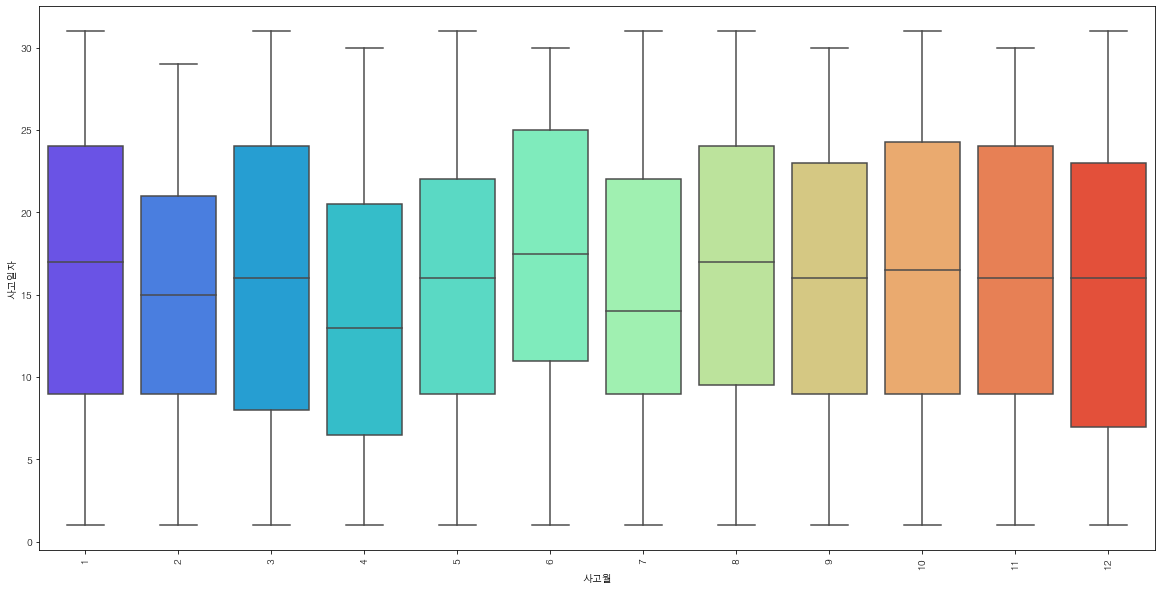

In [488]:
plt.figure(figsize=(20,10))
g = sns.boxplot(x='사고월', y='사고일자', data=data_1, palette='rainbow')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

### 로그스케일러

In [ ]:
#끝까지돌리고 다시 돌아오자

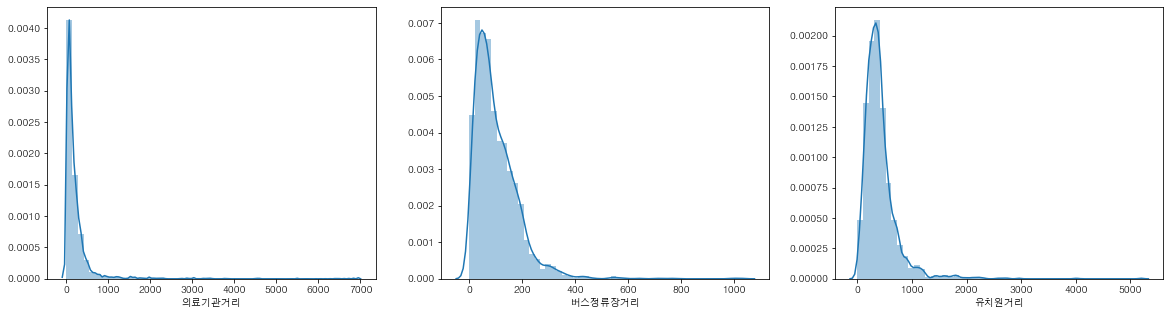

In [489]:
fig,ax = plt.subplots(figsize=(20,5),ncols=3)


sns.distplot(data_1.iloc[:,17],ax=ax[0])
sns.distplot(data_1.iloc[:,18],ax=ax[1])
sns.distplot(data_1.iloc[:,19],ax=ax[2])

In [ ]:
#하나하나

In [511]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 608964 to 613744
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   사고년도                  2256 non-null   int32  
 1   사고월                   2256 non-null   int32  
 2   사고일자                  2256 non-null   int32  
 3   사고시간                  2256 non-null   int32  
 4   사고요일                  2256 non-null   object 
 5   사고형태(Y값)              2256 non-null   object 
 6   법규위반내용                2256 non-null   object 
 7   은행거리                  2256 non-null   float64
 8   교차로거리                 2256 non-null   float64
 9   의료기관거리                2256 non-null   float64
 10  버스정류장거리               2256 non-null   float64
 11  유치원거리                 2256 non-null   float64
 12  시외고속버스터미널거리           2256 non-null   float64
 13  육교거리                  2256 non-null   float64
 14  의료기관_갯수               2256 non-null   float64
 15  원형200m내_16_세대수     

#  
#  
#  공부를 더해버려야되나;;;;  토요일까지 끝내자

#  
# 비닝/원핫/더미 변수

In [ ]:
# 변수명이 너무 제멋대로네ㅋㅋㅋㅋ
# 재조정 해주자

In [ ]:
# 음주/어린이/노인 재정립해주기

In [ ]:
# 여기가 정신적으로 고통스럽네

In [512]:
data_1.columns

Index(['사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고형태(Y값)', '사망자수', '중상자수',
       '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고', '보행자사고', '법규위반내용', '은행거리',
       '교차로거리', '의료기관거리', '버스정류장거리', '유치원거리', '시외고속버스터미널거리', '육교거리', '의료기관_갯수',
       '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '아동,어린이집거리', '노인정거리',
       '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기', '원형200m내_일반주택수',
       '원형200m내_연립주택수', '중심선_1/3크기 도로폭', '창원시구', '창원시동', '사고유형', '노면상태',
       '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해자 차종', '피해자 성별', '피해자 연령', '피해자 상해정도'],
      dtype='object')

In [513]:
print(data_1.isnull().sum().sum())

0


In [ ]:
#요일,   더미
#y값    수치 (상관분석 이전에)
#음주,어린이,노인   0을 1로 결측치?는 0으로

#사고유형,노면상태,기상상태,도로형태 는 미리 묶어두고 더미 변수화 하기

[스킵)라이트 지비엠으로](#lgbm)

# 추가변수(이건 머 건들꺼 없지ㅋㅋ) 

### 위쪽에서 이 과정을 해주는게 더 좋았을꺼 같긴하다

In [514]:
season_1 = []
for i in data_2['사고월']:
    if i >=3 and i<=5:
        season_1 = '봄'
    elif i >=6 and i<=8:
        season_1 = '여름'
    elif i >=9 and i<=11:
        season_1 = '가을'
    elif i == 12 and i == 1 and i==2:
        season_1 = '겨울'
        
data_2['season_'] =season_1

In [515]:
seperate_four = []

for season, time in zip(data_2['season_'], data_2['사고시간']):
    if season == '겨울' and time >= 0 and time <= 8:
        seperate_four.append('새벽')
    elif season == '겨울' and time > 8 and time <= 12:
        seperate_four.append('오전')
    elif season == '겨울' and time > 12 and time < 18:
        seperate_four.append('오후')
    elif season == '겨울' and time >= 18 and time <= 23:
        seperate_four.append('저녁')    
    elif season == '봄' and time >= 0 and time <= 7:
        seperate_four.append('새벽')
    elif season == '봄' and time > 7 and time <= 12:
        seperate_four.append('오전')
    elif season == '봄' and time > 12 and time < 19:
        seperate_four.append('오후')
    elif season == '봄' and time >= 19 and time <= 23:
        seperate_four.append('저녁')
    elif season == '여름' and time >= 0 and time <= 6:
        seperate_four.append('새벽')
    elif season == '여름' and time > 6 and time <= 12:
        seperate_four.append('오전')
    elif season == '여름' and time > 12 and time < 20:
        seperate_four.append('오후')
    elif season == '여름' and time >= 20 and time <= 23:
        seperate_four.append('저녁')
    elif season == '가을' and time >= 0 and time <= 7:
        seperate_four.append('새벽')
    elif season == '가을' and time > 7 and time <= 12:
        seperate_four.append('오전')
    elif season == '가을' and time > 12 and time < 19:
        seperate_four.append('오후')
    elif season == '가을' and time >= 19 and time <= 23:
        seperate_four.append('저녁')
        
data_2['하루분기'] = seperate_four

In [ ]:
# 변수 세팅덜 끝남
# 순화변수

In [255]:
data_1.corr()

,사고년도,사고월,사고일자,사고시간,은행거리,교차로거리,의료기관거리,버스정류장거리,유치원거리,시외고속버스터미널거리,육교거리,의료기관_갯수,원형200m내_16_세대수,원형200m내_16_인구수,원형200m내_16_10대인구,원형200m내_16_20대인구,원형200m내_16_30대인구,원형200m내_16_40대인구,원형200m내_16_50대인구,원형200m내_16_60대이상인구,"아동,어린이집거리",노인정거리,원형200m내_의료기관크기,원형200m내_의료기관거주건물 총크기,원형200m내_일반주택수,원형200m내_연립주택수
사고년도,1.000000,0.005480,0.020731,0.002723,0.051194,0.008623,-0.001762,0.017115,0.010812,0.028928,0.031446,0.023373,-0.035246,-0.034675,-0.027951,-0.031741,-0.027647,-0.032060,-0.040381,-0.046001,0.055303,0.029412,0.042020,0.029384,-0.025399,-0.017941
사고월,0.005480,1.000000,0.012989,0.012655,-0.009357,-0.020755,-0.027444,-0.018332,-0.030386,-0.027979,0.006427,-0.024587,0.003517,0.005482,0.001594,0.006068,-0.005266,0.007694,0.016040,0.020842,-0.035672,-0.025450,-0.013471,-0.028988,0.005297,-0.012516
사고일자,0.020731,0.012989,1.000000,0.033004,-0.027530,-0.025613,-0.035030,-0.020737,-0.022626,-0.039461,-0.007983,-0.003651,0.003738,-0.002345,-0.010657,0.002570,-0.009196,-0.005552,0.014150,0.029241,-0.036041,-0.008112,0.024251,-0.018750,0.065338,0.004414
사고시간,0.002723,0.012655,0.033004,1.000000,0.008792,0.035090,0.032524,0.015116,0.001588,0.060226,0.054891,-0.010425,-0.014197,-0.011074,0.001992,-0.021541,0.000805,-0.006937,-0.034431,-0.045280,-0.005759,-0.011929,0.002728,-0.024534,-0.009550,0.024702
은행거리,0.051194,-0.009357,-0.027530,0.008792,1.000000,0.399802,0.526630,0.031344,0.336390,0.344644,0.433794,-0.184374,-0.140746,-0.115836,-0.079673,-0.157823,-0.080196,-0.115451,-0.151509,-0.120388,0.383280,0.220859,-0.054565,-0.110566,-0.008569,-0.037786
교차로거리,0.008623,-0.020755,-0.025613,0.035090,0.399802,1.000000,0.476738,0.135725,0.309905,0.172202,0.374048,-0.169233,-0.144921,-0.120146,-0.092962,-0.152622,-0.103009,-0.105324,-0.132109,-0.123259,0.250145,0.204831,-0.093334,-0.131064,0.039325,-0.017740
의료기관거리,-0.001762,-0.027444,-0.035030,0.032524,0.526630,0.476738,1.000000,0.178474,0.607798,0.219549,0.374653,-0.262457,-0.155517,-0.133170,-0.092746,-0.160164,-0.095533,-0.116320,-0.185831,-0.183101,0.676858,0.400006,-0.081907,-0.140786,-0.083021,-0.101772
버스정류장거리,0.017115,-0.018332,-0.020737,0.015116,0.031344,0.135725,0.178474,1.000000,0.108893,0.097272,0.035889,-0.116257,-0.045506,-0.041033,-0.019583,-0.066562,-0.047848,-0.011960,-0.061732,-0.079645,0.155711,0.133591,-0.043093,-0.019602,-0.005567,0.052344
유치원거리,0.010812,-0.030386,-0.022626,0.001588,0.336390,0.309905,0.607798,0.108893,1.000000,0.180117,0.340200,-0.077902,-0.226848,-0.210030,-0.178444,-0.219467,-0.155263,-0.204186,-0.240254,-0.213786,0.623864,0.450720,-0.015107,0.017526,-0.198446,-0.155208
시외고속버스터미널거리,0.028928,-0.027979,-0.039461,0.060226,0.344644,0.172202,0.219549,0.097272,0.180117,1.000000,0.399885,-0.107666,-0.042335,-0.031353,0.075315,-0.121975,0.108287,-0.046233,-0.250659,-0.301925,0.199111,0.106500,0.023392,-0.035431,-0.210087,0.226906


In [ ]:
# 날라간 50개

#y값이 날라갔어!!!!
#내맘대로도 날라갔어!!

In [55]:
la = list(data_1.columns)
lb = list(data_1.corr().columns)
la_sub_lb = [x for x in la if x not in lb]
#la_sub_lb

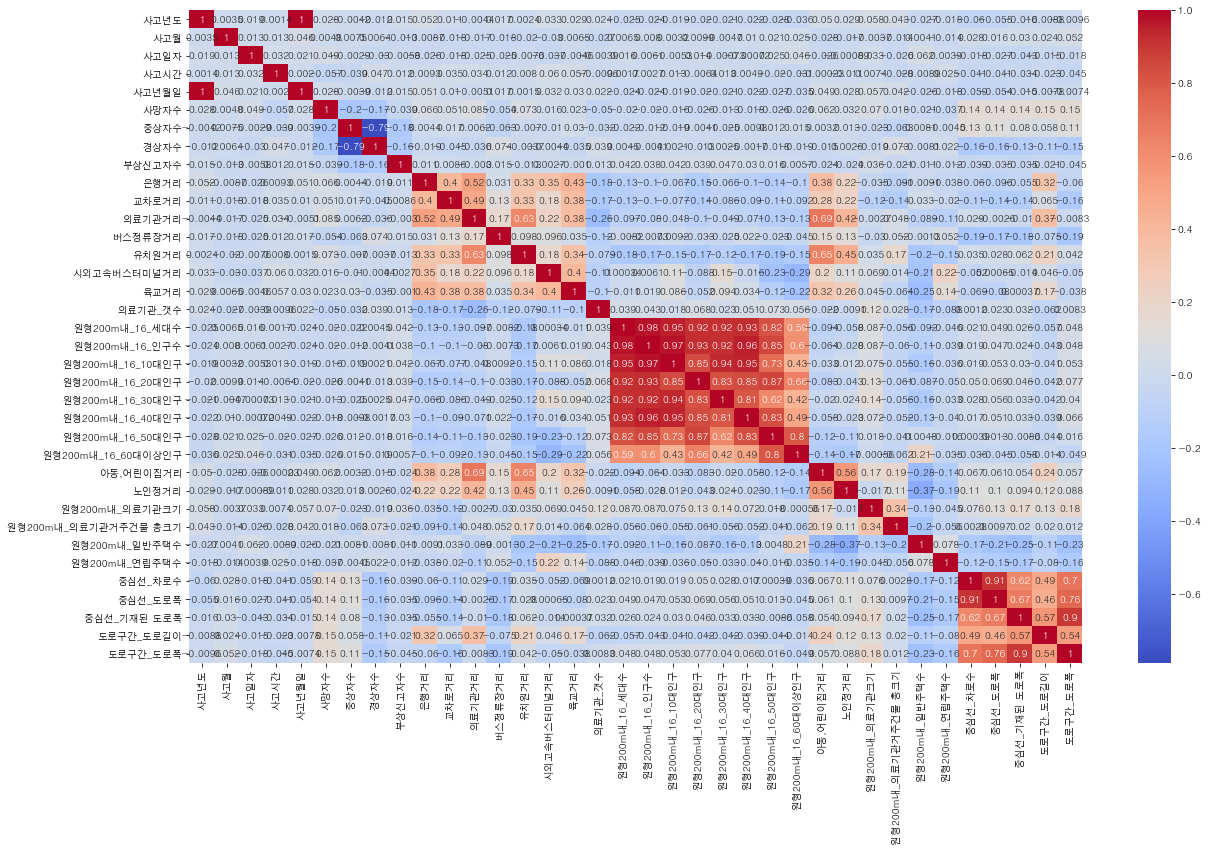

In [45]:
sns.heatmap(data_1.corr(),annot=True,cmap='coolwarm')